# Numpy and Linear Algebra

## Where do numpy arrays show up in ML?

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.DataFrame([[0,2,1], [2,3,4], [8,5,6]], columns=["x1", "x2", "y"])
df

,x1,x2,y
0,0,2,1
1,2,3,4
2,8,5,6


In [3]:
print(type(df.values))
df.values

<class 'numpy.ndarray'>


array([[0, 2, 1],
       [2, 3, 4],
       [8, 5, 6]])

In [4]:
lr = LinearRegression()
lr.fit(df[["x1", "x2"]], df["y"])
lr.coef_

array([-2.,  7.])

In [5]:
lr.predict(df[["x1", "x2"]])

array([1., 4., 6.])

In [6]:
# "@" is the dot product -- will learn more soon
df[["x1", "x2"]].values @ lr.coef_ + lr.intercept_

array([1., 4., 6.])

## How to create numpy arrays from scratch?

In [7]:
import numpy as np

np.array([7,8,9])

array([7, 8, 9])

In [8]:
np.zeros(8)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
np.ones(8)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
# list(range(START, END, STEP))

In [12]:
list(range(10, 20, 2))

[10, 12, 14, 16, 18]

In [13]:
# doesn't work in Python -- need ints
# list(range(0, 1, 0.2))

In [14]:
np.arange(0, 1, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

## How to slice numpy arrays?

In [15]:
a = [7,8,9,10]
b = a[1 :  : 2] # slicing a list creates an independent list
b

[8, 10]

In [16]:
b[1] = 100
b

[8, 100]

In [17]:
a

[7, 8, 9, 10]

In [18]:
a = np.array([7,8,9,10])
b = a[1 :  : 2] # numpy slices still share with the originals
b

array([ 8, 10])

In [19]:
b[1] = 100
b

array([  8, 100])

In [20]:
a

array([  7,   8,   9, 100])

## Using Multi-Dimensional Arrays

In [21]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [22]:
len(a)

3

In [23]:
a.shape # 1D, size 3 (vector)

(3,)

In [24]:
b = np.array([[1,2,3], [4,5,6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
len(b)

2

In [26]:
b.shape

(2, 3)

In [27]:
b.reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [28]:
b.reshape(6)

array([1, 2, 3, 4, 5, 6])

In [29]:
#b.reshape(3,3)

In [30]:
b.reshape(3,-1) # -1 means whatever size is necessary

array([[1, 2],
       [3, 4],
       [5, 6]])

In [31]:
b.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [32]:
b.reshape(1,-1)

array([[1, 2, 3, 4, 5, 6]])

In [33]:
b.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [34]:
np.ones(80).reshape(-1,8)

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [35]:
# scalar=0D, vector=1D, matrix=2D
# tensor: array of any number of dimensions

## Images as Tensors

In [37]:
# ! wget https://upload.wikimedia.org/wikipedia/commons/f/f2/Coccinella_magnifica01.jpg -O bug.jpg

In [38]:
import matplotlib.pyplot as plt

a = plt.imread("bug.jpg") # pip3 install Pillow

In [40]:
a.shape # ROW SIZE, COLUMN SIZE, COLORS (red, green, blue)

(1688, 2521, 3)

In [43]:
# two scales: 0-255 for color (int) or 0-1 for color (float)

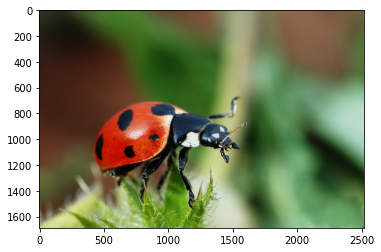

In [44]:
plt.imshow(a)

In [ ]:
#a[ROW SLICE, COL SLICE, COLOR SLICE]

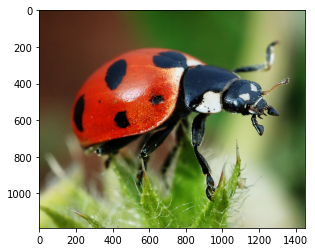

In [47]:
plt.imshow(a[500:, 250:1700, :])

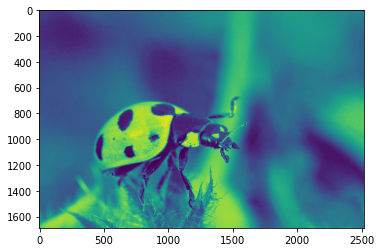

In [51]:
plt.imshow(a[:, :, 0]) # 0=red, 1=green, 2=blue

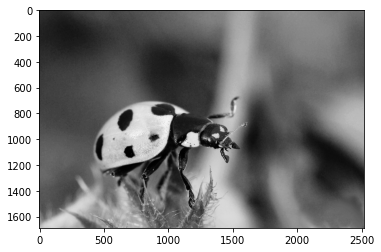

In [52]:
plt.imshow(a[:, :, 0], cmap="gray") # use colormap to show in grayscale

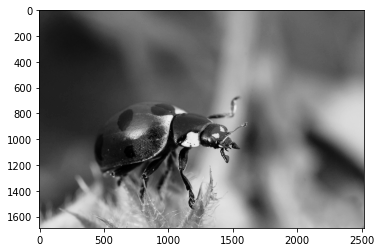

In [53]:
plt.imshow(a[:, :, 1], cmap="gray") # make green areas bright

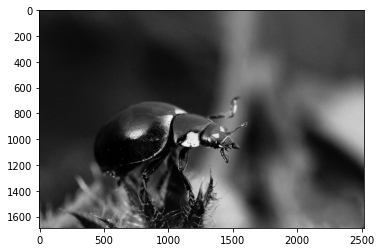

In [54]:
plt.imshow(a[:, :, 2], cmap="gray") # make blue areas bright

## Vector Multiplication: Overview

### Elementwise Multiplication

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$

### Dot Product

$\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
\cdot
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$

In [55]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])

In [56]:
v1 * v2   # [1*4, 2*5, 3*6]

array([ 4, 10, 18])

## Transpose

In [58]:
# strategy for horizontal/vertical is to make vectors 2D, either 1 row or 1 column

In [74]:
v1 = np.array([1,2,3]).reshape(-1, 1)  # 1 column means vertical
v2 = np.array([4,5,6]).reshape(-1, 1)
v2

array([[4],
       [5],
       [6]])

In [60]:
v1*v2

array([[ 4],
       [10],
       [18]])

In [64]:
v1.T.T.T # transpose: flit horizontal/vertical

array([[1, 2, 3]])

## Broadcast

In [65]:
v1.T.shape

(1, 3)

In [66]:
v2.shape

(3, 1)

In [67]:
v1.T * v2

array([[ 4,  8, 12],
       [ 5, 10, 15],
       [ 6, 12, 18]])

In [68]:
# np is "broadcasting" (stretching) matrices to make them compatible shapes

In [71]:
v1_t_broadcast = np.concatenate([v1.T, v1.T, v1.T])
v1_t_broadcast

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [77]:
v2_broadcast = np.concatenate([v2,v2,v2], axis=1) # 0=down, 1=across
v2_broadcast

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [78]:
v1_t_broadcast * v2_broadcast

array([[ 4,  8, 12],
       [ 5, 10, 15],
       [ 6, 12, 18]])

In [85]:
digits = np.arange(1, 10).reshape(1, -1)
digits2 = np.arange(1, 5).reshape(1, -1)
digits

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [86]:
digits * digits2.T

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36]])

In [88]:
digits2 * digits.T

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20],
       [ 6, 12, 18, 24],
       [ 7, 14, 21, 28],
       [ 8, 16, 24, 32],
       [ 9, 18, 27, 36]])

In [89]:
digits2.shape, digits.T.shape

((1, 4), (9, 1))

In [94]:
img = a / 255

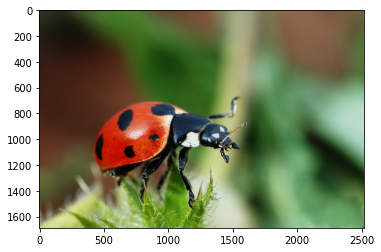

In [95]:
plt.imshow(img)

In [97]:
img.shape

(1688, 2521, 3)

In [100]:
filt = np.arange(1, 0, -1/img.shape[1])
filt.shape

(2521,)

In [104]:
filt.reshape(1, -1, 1).shape

(1, 2521, 1)

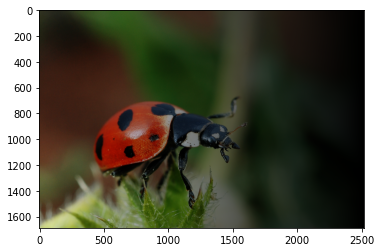

In [106]:
plt.imshow(img * filt.reshape(1, -1, 1))

In [108]:
img.shape

(1688, 2521, 3)

In [107]:
filt.reshape(-1, 1).shape

(2521, 1)

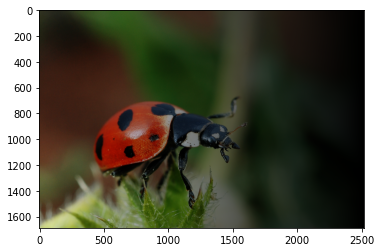

In [110]:
plt.imshow(img * filt.reshape(-1, 1))

## Dot Product

In [114]:
v1.T

array([[1, 2, 3]])

In [112]:
v2

array([[4],
       [5],
       [6]])

In [113]:
# dot product: row vector multiplied by a column vector

In [115]:
np.dot(v1.T, v2)

array([[32]])

In [116]:
v1.T.dot(v2)

array([[32]])

In [118]:
v1.T @ v2 # @ means "dot product"

array([[32]])

In [119]:
1*4 + 2*5 + 3*6

32